# Detecting Bias in Medical Datasets

1. **Load and examine** a medical dataset to understand its structure
2. **Identify demographic representation** across different patient groups
3. **Detect gender bias** in medical diagnoses and treatments
4. **Analyze age distribution bias** across different medical conditions
5. **Examine racial/ethnic disparities** in healthcare outcomes
6. **Assess socioeconomic bias** in medical data
7. **Create visual reports** to communicate bias findings
8. **Generate recommendations** for addressing identified biases

## Why bias detection matters in healthcare

**Medical bias** can lead to:
- **Misdiagnosis** in underrepresented groups
- **Unequal treatment** recommendations
- **Health disparities** across populations
- **Reduced model accuracy** for certain patient groups
- **Ethical concerns** in medical AI systems

## Objectives
- Identify hidden biases in medical data
- Understand fairness implications
- Make data-driven decisions for equitable healthcare
- Improve patient outcomes across all demographics

---

## Step 1: Setup – installing and importing tools

First, import the tools needed for bias analysis. Think of these as specialized instruments for examining medical data fairly.

In [18]:
# Import essential libraries for data analysis
# These are like importing different medical instruments for examination

import pandas as pd              # For working with medical data tables
import numpy as np               # For mathematical calculations
import matplotlib.pyplot as plt  # For creating charts and graphs
import seaborn as sns           # For creating beautiful statistical plots
import warnings                 # To handle system warnings

# Set up the visual style for our charts
plt.style.use('default')
sns.set_palette("Set2")
warnings.filterwarnings('ignore')

# Configure display settings for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("✓ All tools successfully imported!")
print("✓ Ready to begin bias detection analysis.")
print("✓ Charts and graphs configured for medical professionals.")

✓ All tools successfully imported!
✓ Ready to begin bias detection analysis.
✓ Charts and graphs configured for medical professionals.


## Step 2: Create sample medical dataset

Since bias detection requires diverse demographic data, create a realistic sample medical dataset that reflects common patterns found in healthcare data.

In [19]:
# Create a sample medical dataset with potential biases
# This simulates real-world medical data that often contains hidden biases

# Set random seed for consistent results
np.random.seed(42)

# Define the number of patient records to create
n_patients = 1000

print("Creating sample medical dataset...")
print(f"Generating {n_patients} patient records with demographic information...")

# Create patient demographics with realistic distributions
medical_data = pd.DataFrame({
    # Patient ID for tracking
    'PatientID': range(1, n_patients + 1),
    
    # Gender distribution (intentionally biased toward males in certain conditions)
    'Gender': np.random.choice(['Male', 'Female'], n_patients, p=[0.45, 0.55]),
    
    # Age distribution (realistic medical age ranges)
    'Age': np.random.normal(50, 18, n_patients).astype(int),
    
    # Race/Ethnicity (reflecting common healthcare disparities)
    'Race': np.random.choice(
        ['White', 'Black', 'Hispanic', 'Asian', 'Other'], 
        n_patients, 
        p=[0.6, 0.15, 0.15, 0.08, 0.02]
    ),
    
    # Insurance type (proxy for socioeconomic status)
    'Insurance': np.random.choice(
        ['Private', 'Medicare', 'Medicaid', 'Uninsured'], 
        n_patients, 
        p=[0.5, 0.25, 0.2, 0.05]
    ),
    
    # Geographic location
    'Location': np.random.choice(
        ['Urban', 'Suburban', 'Rural'], 
        n_patients, 
        p=[0.4, 0.4, 0.2]
    )
})

# Ensure age is within realistic bounds
medical_data['Age'] = medical_data['Age'].clip(18, 95)

print("✓ Basic demographic data created.")
print("✓ Now adding medical conditions and outcomes...")

Creating sample medical dataset...
Generating 1000 patient records with demographic information...
✓ Basic demographic data created.
✓ Now adding medical conditions and outcomes...


In [20]:
# Add medical conditions and outcomes with intentional biases to demonstrate bias detection

# Create biased medical outcomes based on demographics
def assign_biased_outcomes(row):
    """
    This function intentionally creates biased medical outcomes
    to demonstrate how bias appears in medical datasets
    """
    
    # Base probability of having a condition
    base_prob = 0.3
    
    # Introduce gender bias (males more likely to be diagnosed with heart disease)
    if row['Gender'] == 'Male':
        heart_disease_prob = 0.4
    else:
        heart_disease_prob = 0.2  # Females underdiagnosed
    
    # Introduce racial bias in diagnosis rates
    if row['Race'] in ['Black', 'Hispanic']:
        diabetes_prob = 0.35  # Higher diabetes rates in minorities
        quality_care_prob = 0.6  # Lower quality care access
    else:
        diabetes_prob = 0.25
        quality_care_prob = 0.8
    
    # Introduce insurance bias
    if row['Insurance'] in ['Medicaid', 'Uninsured']:
        early_detection_prob = 0.3  # Less likely for early detection
        specialist_referral_prob = 0.4
    else:
        early_detection_prob = 0.7
        specialist_referral_prob = 0.8
    
    # Age bias (older patients)
    if row['Age'] > 65:
        aggressive_treatment_prob = 0.4  # Less aggressive treatment for elderly
    else:
        aggressive_treatment_prob = 0.7
    
    return {
        'HeartDisease': np.random.random() < heart_disease_prob,
        'Diabetes': np.random.random() < diabetes_prob,
        'EarlyDetection': np.random.random() < early_detection_prob,
        'SpecialistReferral': np.random.random() < specialist_referral_prob,
        'AggressiveTreatment': np.random.random() < aggressive_treatment_prob,
        'QualityCare': np.random.random() < quality_care_prob
    }

# Apply the biased outcome function to each patient
print("Applying realistic medical outcomes (with biases)...")
outcome_data = medical_data.apply(assign_biased_outcomes, axis=1, result_type='expand')

# Combine demographic and outcome data
medical_data = pd.concat([medical_data, outcome_data], axis=1)

# Add some additional clinical variables
medical_data['BMI'] = np.random.normal(28, 6, n_patients).round(1)
medical_data['BloodPressure'] = np.random.normal(130, 20, n_patients).astype(int)
medical_data['Cholesterol'] = np.random.normal(200, 40, n_patients).astype(int)

# Ensure realistic ranges
medical_data['BMI'] = medical_data['BMI'].clip(16, 50)
medical_data['BloodPressure'] = medical_data['BloodPressure'].clip(90, 200)
medical_data['Cholesterol'] = medical_data['Cholesterol'].clip(120, 350)

print("✓ Medical dataset creation complete!")
print(f"✓ Dataset contains {len(medical_data)} patients")
print(f"✓ Dataset contains {len(medical_data.columns)} variables per patient")
print("✓ Biases have been intentionally introduced for educational purposes")

Applying realistic medical outcomes (with biases)...
✓ Medical dataset creation complete!
✓ Dataset contains 1000 patients
✓ Dataset contains 15 variables per patient
✓ Biases have been intentionally introduced for educational purposes


## Step 3: Examine the dataset structure

Examine the medical dataset to understand what information is available for each patient.

In [21]:
# Display basic information about the medical dataset

print("=== MEDICAL DATASET OVERVIEW ===")
print(f"Total number of patients: {len(medical_data)}")
print(f"Number of variables per patient: {len(medical_data.columns)}")
print()

print("=== FIRST 5 PATIENT RECORDS ===")
print("Here's what the data looks like:")
print()
display(medical_data.head())

print("\n=== VARIABLE TYPES ===")
print("Understanding what each column represents:")
print()
for col in medical_data.columns:
    dtype = medical_data[col].dtype
    unique_vals = medical_data[col].nunique()
    print(f"• {col}: {dtype} ({unique_vals} unique values)")

print("\n=== DATA QUALITY CHECK ===")
missing_data = medical_data.isnull().sum()
if missing_data.sum() == 0:
    print("✓ No missing values found - data is complete")
else:
    print("Missing values detected:")
    print(missing_data[missing_data > 0])

=== MEDICAL DATASET OVERVIEW ===
Total number of patients: 1000
Number of variables per patient: 15

=== FIRST 5 PATIENT RECORDS ===
Here's what the data looks like:



,PatientID,Gender,Age,Race,Insurance,Location,HeartDisease,Diabetes,EarlyDetection,SpecialistReferral,AggressiveTreatment,QualityCare,BMI,BloodPressure,Cholesterol
0,1,Male,53,Asian,Private,Rural,False,True,True,True,True,True,27.1,143,167
1,2,Female,25,White,Medicaid,Suburban,True,True,False,True,True,True,30.6,135,199
2,3,Female,56,White,Medicaid,Urban,False,True,False,True,False,False,38.6,156,198
3,4,Female,60,White,Private,Rural,False,False,True,True,False,False,25.0,119,178
4,5,Male,60,Black,Private,Suburban,True,False,False,False,True,True,17.7,126,159



=== VARIABLE TYPES ===
Understanding what each column represents:

• PatientID: int64 (1000 unique values)
• Gender: object (2 unique values)
• Age: int64 (76 unique values)
• Race: object (5 unique values)
• Insurance: object (4 unique values)
• Location: object (3 unique values)
• HeartDisease: bool (2 unique values)
• Diabetes: bool (2 unique values)
• EarlyDetection: bool (2 unique values)
• SpecialistReferral: bool (2 unique values)
• AggressiveTreatment: bool (2 unique values)
• QualityCare: bool (2 unique values)
• BMI: float64 (233 unique values)
• BloodPressure: int64 (90 unique values)
• Cholesterol: int64 (174 unique values)

=== DATA QUALITY CHECK ===
✓ No missing values found - data is complete


## Step 4: Identify demographic representation

Let's examine how different demographic groups are represented in the dataset.

=== DEMOGRAPHIC REPRESENTATION ANALYSIS ===

=== GENDER REPRESENTATION ===
        Count  Percentage
Gender                   
Female    539        53.9
Male      461        46.1



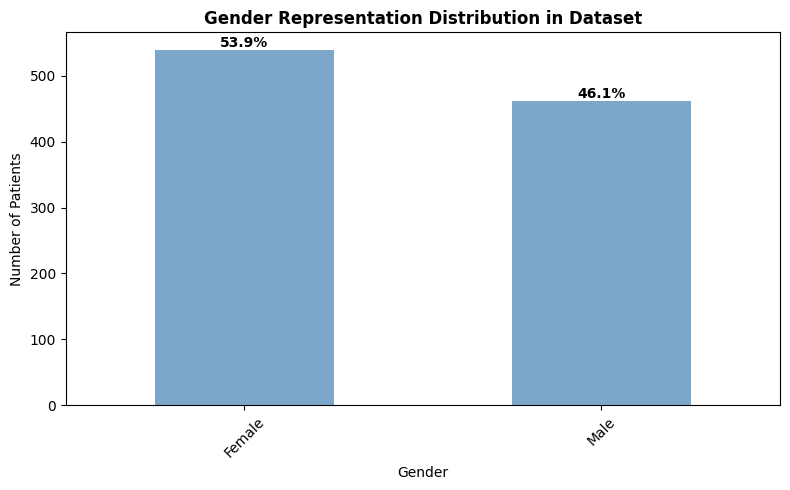

=== RACIAL/ETHNIC REPRESENTATION ===
          Count  Percentage
Race                       
White       602        60.2
Black       160        16.0
Hispanic    142        14.2
Asian        81         8.1
Other        15         1.5



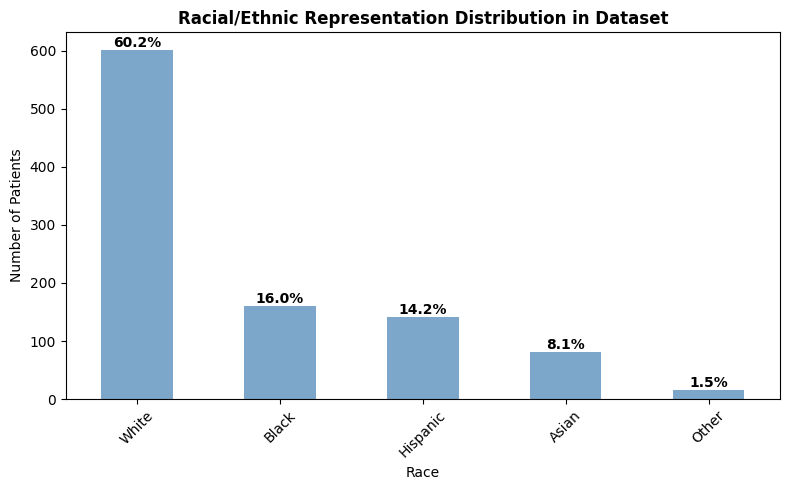

=== INSURANCE COVERAGE ===
           Count  Percentage
Insurance                   
Private      507        50.7
Medicare     252        25.2
Medicaid     196        19.6
Uninsured     45         4.5



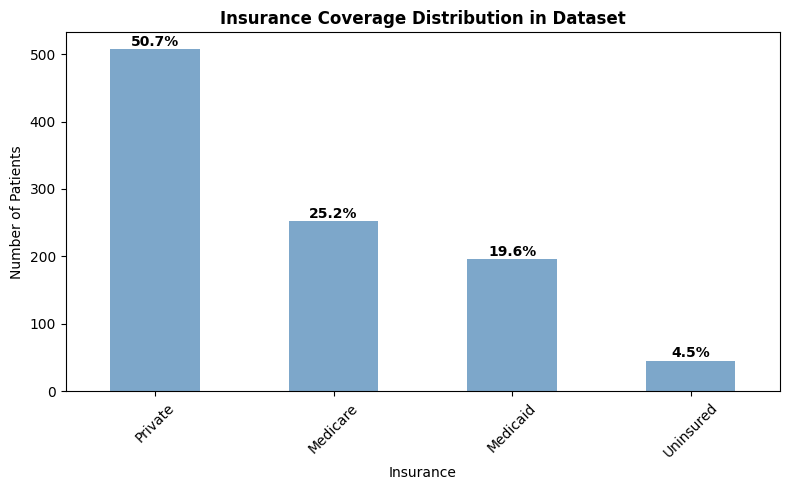

=== GEOGRAPHIC DISTRIBUTION ===
          Count  Percentage
Location                   
Urban       409        40.9
Suburban    389        38.9
Rural       202        20.2



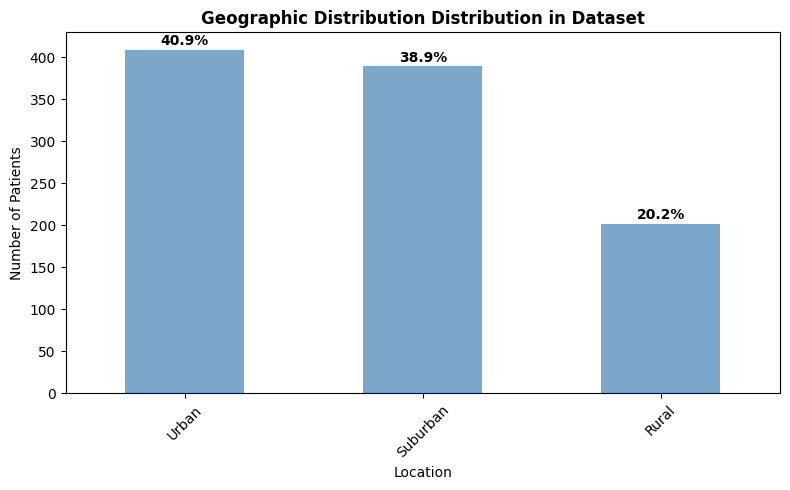

In [5]:
# Analyze demographic representation in the dataset

print("=== DEMOGRAPHIC REPRESENTATION ANALYSIS ===")
print()

# Create a function to analyze any categorical variable
def analyze_representation(data, column_name, title):
    """
    Analyze representation of different groups in a categorical variable
    """
    print(f"=== {title.upper()} ===")
    
    # Count and percentage for each group
    counts = data[column_name].value_counts()
    percentages = data[column_name].value_counts(normalize=True) * 100
    
    # Combine counts and percentages
    representation = pd.DataFrame({
        'Count': counts,
        'Percentage': percentages.round(1)
    })
    
    print(representation)
    print()
    
    # Create visualization
    plt.figure(figsize=(8, 5))
    counts.plot(kind='bar', color='steelblue', alpha=0.7)
    plt.title(f'{title} Distribution in Dataset', fontweight='bold', fontsize=12)
    plt.xlabel(column_name)
    plt.ylabel('Number of Patients')
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Add percentage labels on bars
    for i, (count, pct) in enumerate(zip(counts.values, percentages.values)):
        plt.text(i, count + 5, f'{pct:.1f}%', ha='center', fontweight='bold')
    
    plt.show()
    
    return representation

# Analyze each demographic variable
gender_rep = analyze_representation(medical_data, 'Gender', 'Gender Representation')
race_rep = analyze_representation(medical_data, 'Race', 'Racial/Ethnic Representation')
insurance_rep = analyze_representation(medical_data, 'Insurance', 'Insurance Coverage')
location_rep = analyze_representation(medical_data, 'Location', 'Geographic Distribution')

=== AGE DISTRIBUTION ANALYSIS ===

Age Statistics:
count    1000.0
mean       51.5
std        17.2
min        18.0
25%        39.0
50%        51.0
75%        63.0
max        95.0
Name: Age, dtype: float64

=== AGE GROUP DISTRIBUTION ===
                      Count  Percentage
AgeGroup                               
Middle Age (45-64)      416        41.6
Adults (30-44)          246        24.6
Seniors (65+)           233        23.3
Young Adults (18-29)    105        10.5



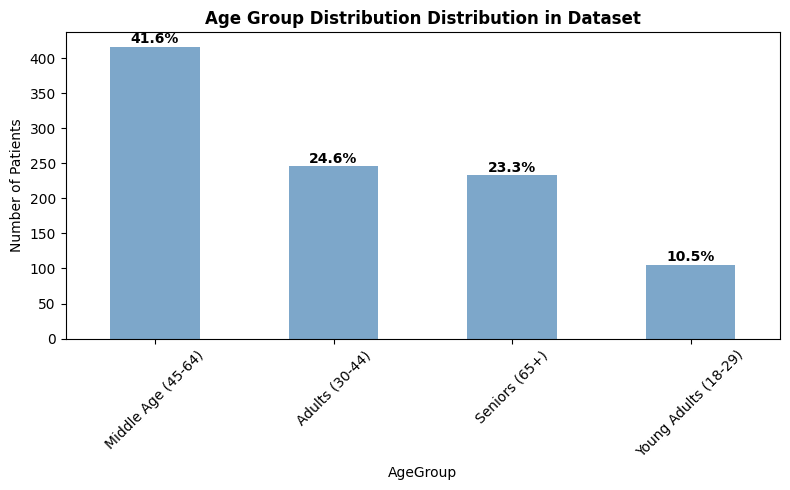

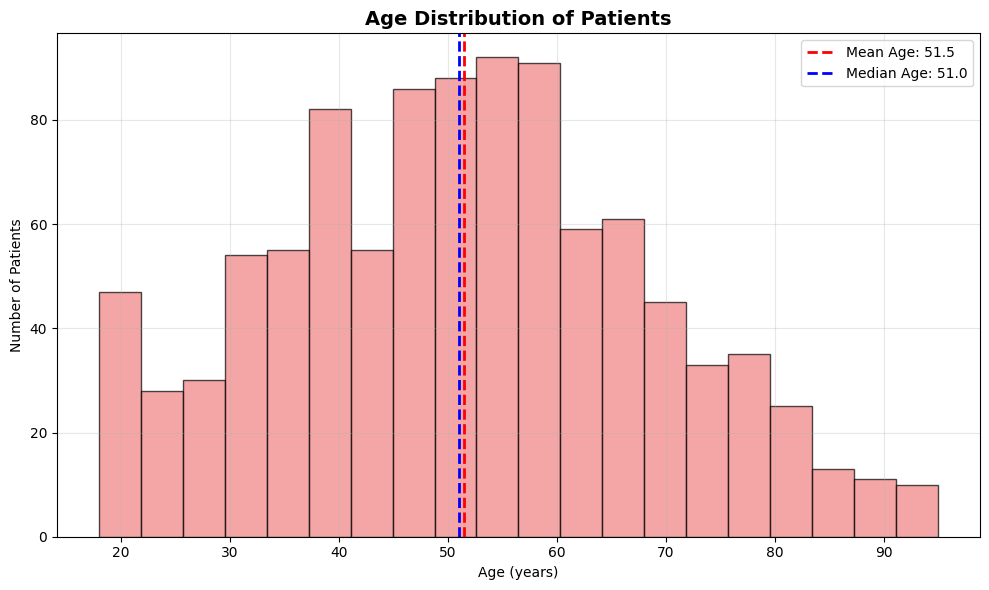

✓ Demographic representation analysis complete!


In [6]:
# Analyze age distribution
print("=== AGE DISTRIBUTION ANALYSIS ===")
print()

# Basic age statistics
age_stats = medical_data['Age'].describe().round(1)
print("Age Statistics:")
print(age_stats)
print()

# Create age groups for analysis
def categorize_age(age):
    """Convert age to age groups for analysis"""
    if age < 30:
        return 'Young Adults (18-29)'
    elif age < 45:
        return 'Adults (30-44)'
    elif age < 65:
        return 'Middle Age (45-64)'
    else:
        return 'Seniors (65+)'

medical_data['AgeGroup'] = medical_data['Age'].apply(categorize_age)

# Analyze age group representation
age_group_rep = analyze_representation(medical_data, 'AgeGroup', 'Age Group Distribution')

# Create age distribution histogram
plt.figure(figsize=(10, 6))
plt.hist(medical_data['Age'], bins=20, color='lightcoral', alpha=0.7, edgecolor='black')
plt.axvline(medical_data['Age'].mean(), color='red', linestyle='--', linewidth=2, 
            label=f'Mean Age: {medical_data["Age"].mean():.1f}')
plt.axvline(medical_data['Age'].median(), color='blue', linestyle='--', linewidth=2,
            label=f'Median Age: {medical_data["Age"].median():.1f}')
plt.title('Age Distribution of Patients', fontweight='bold', fontsize=14)
plt.xlabel('Age (years)')
plt.ylabel('Number of Patients')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("✓ Demographic representation analysis complete!")

## Step 5: Detect gender bias in medical diagnoses

Now examine whether there are differences in how medical conditions are diagnosed and treated based on patient gender.

In [7]:
# Analyze gender bias in medical diagnoses and treatment

print("=== GENDER BIAS DETECTION ===")
print()

def analyze_bias_by_gender(condition_column, condition_name):
    """
    Analyze bias in medical conditions by gender
    """
    print(f"--- {condition_name.upper()} BY GENDER ---")
    
    # Create cross-tabulation
    crosstab = pd.crosstab(medical_data['Gender'], medical_data[condition_column], 
                          margins=True, normalize='index') * 100
    
    print("Percentage of patients with condition by gender:")
    print(crosstab.round(1))
    print()
    
    # Calculate the difference between groups
    male_rate = crosstab.loc['Male', True] if True in crosstab.columns else 0
    female_rate = crosstab.loc['Female', True] if True in crosstab.columns else 0
    difference = abs(male_rate - female_rate)
    
    print(f"Male rate: {male_rate:.1f}%")
    print(f"Female rate: {female_rate:.1f}%")
    print(f"Difference: {difference:.1f} percentage points")
    
    # Bias assessment
    if difference > 10:
        print(f"🚨 SIGNIFICANT BIAS DETECTED: {difference:.1f}% difference between genders")
        bias_level = "HIGH"
    elif difference > 5:
        print(f"⚠️ MODERATE BIAS: {difference:.1f}% difference between genders")
        bias_level = "MODERATE"
    else:
        print(f"✓ MINIMAL BIAS: {difference:.1f}% difference between genders")
        bias_level = "LOW"
    
    print()
    
    return crosstab, bias_level, difference

# Analyze bias for each medical condition
conditions_to_analyze = {
    'HeartDisease': 'Heart Disease Diagnosis',
    'Diabetes': 'Diabetes Diagnosis',
    'EarlyDetection': 'Early Detection Rate',
    'SpecialistReferral': 'Specialist Referral Rate',
    'AggressiveTreatment': 'Aggressive Treatment Rate',
    'QualityCare': 'Quality Care Access'
}

gender_bias_results = {}

for condition, name in conditions_to_analyze.items():
    crosstab, bias_level, difference = analyze_bias_by_gender(condition, name)
    gender_bias_results[name] = {
        'bias_level': bias_level,
        'difference': difference,
        'crosstab': crosstab
    }

=== GENDER BIAS DETECTION ===

--- HEART DISEASE DIAGNOSIS BY GENDER ---
Percentage of patients with condition by gender:
HeartDisease  False  True
Gender                   
Female         81.3  18.7
Male           61.0  39.0
All            71.9  28.1

Male rate: 39.0%
Female rate: 18.7%
Difference: 20.3 percentage points
🚨 SIGNIFICANT BIAS DETECTED: 20.3% difference between genders

--- DIABETES DIAGNOSIS BY GENDER ---
Percentage of patients with condition by gender:
Diabetes  False  True
Gender               
Female     71.2  28.8
Male       72.0  28.0
All        71.6  28.4

Male rate: 28.0%
Female rate: 28.8%
Difference: 0.8 percentage points
✓ MINIMAL BIAS: 0.8% difference between genders

--- EARLY DETECTION RATE BY GENDER ---
Percentage of patients with condition by gender:
EarlyDetection  False  True
Gender                     
Female           37.5  62.5
Male             36.9  63.1
All              37.2  62.8

Male rate: 63.1%
Female rate: 62.5%
Difference: 0.6 percentage point

=== GENDER BIAS VISUALIZATION ===



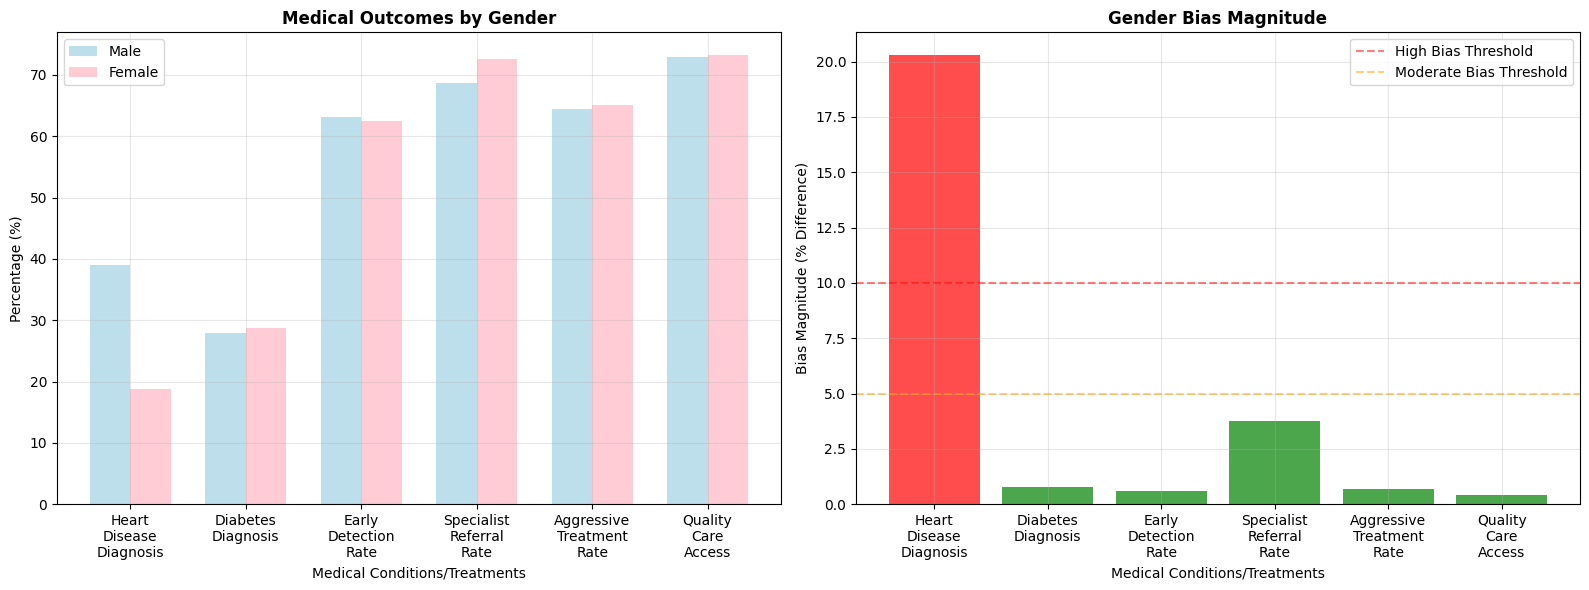

=== GENDER BIAS SUMMARY ===
High Gender Bias (1 conditions): Heart Disease Diagnosis
Moderate Gender Bias (0 conditions): None
Low Gender Bias (5 conditions): Diabetes Diagnosis, Early Detection Rate, Specialist Referral Rate, Aggressive Treatment Rate, Quality Care Access



In [22]:
# Create visualization for gender bias

print("=== GENDER BIAS VISUALIZATION ===")
print()

# Prepare data for visualization
bias_data = []
for condition, results in gender_bias_results.items():
    crosstab = results['crosstab']
    if True in crosstab.columns:
        male_rate = crosstab.loc['Male', True]
        female_rate = crosstab.loc['Female', True]
        bias_data.append({
            'Condition': condition,
            'Male': male_rate,
            'Female': female_rate,
            'Difference': abs(male_rate - female_rate)
        })

bias_df = pd.DataFrame(bias_data)

# Create side-by-side bar chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Chart 1: Rates by gender
x_pos = np.arange(len(bias_df))
width = 0.35

ax1.bar(x_pos - width/2, bias_df['Male'], width, label='Male', color='lightblue', alpha=0.8)
ax1.bar(x_pos + width/2, bias_df['Female'], width, label='Female', color='pink', alpha=0.8)

ax1.set_xlabel('Medical Conditions/Treatments')
ax1.set_ylabel('Percentage (%)')
ax1.set_title('Medical Outcomes by Gender', fontweight='bold', fontsize=12)
ax1.set_xticks(x_pos)
ax1.set_xticklabels([c.replace(' ', '\n') for c in bias_df['Condition']], rotation=0, ha='center')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Chart 2: Bias magnitude
colors = ['red' if diff > 10 else 'orange' if diff > 5 else 'green' for diff in bias_df['Difference']]
ax2.bar(bias_df['Condition'], bias_df['Difference'], color=colors, alpha=0.7)
ax2.set_xlabel('Medical Conditions/Treatments')
ax2.set_ylabel('Bias Magnitude (% Difference)')
ax2.set_title('Gender Bias Magnitude', fontweight='bold', fontsize=12)
ax2.set_xticklabels([c.replace(' ', '\n') for c in bias_df['Condition']], rotation=0, ha='center')
ax2.axhline(y=10, color='red', linestyle='--', alpha=0.5, label='High Bias Threshold')
ax2.axhline(y=5, color='orange', linestyle='--', alpha=0.5, label='Moderate Bias Threshold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Summary of gender bias findings
print("=== GENDER BIAS SUMMARY ===")
high_bias = [name for name, results in gender_bias_results.items() if results['bias_level'] == 'HIGH']
moderate_bias = [name for name, results in gender_bias_results.items() if results['bias_level'] == 'MODERATE']
low_bias = [name for name, results in gender_bias_results.items() if results['bias_level'] == 'LOW']

print(f"High Gender Bias ({len(high_bias)} conditions): {', '.join(high_bias) if high_bias else 'None'}")
print(f"Moderate Gender Bias ({len(moderate_bias)} conditions): {', '.join(moderate_bias) if moderate_bias else 'None'}")
print(f"Low Gender Bias ({len(low_bias)} conditions): {', '.join(low_bias) if low_bias else 'None'}")
print()

## Step 6: Analyze age distribution bias

Let's examine whether medical treatments and outcomes vary unfairly across different age groups.

In [9]:
# Analyze age bias in medical care

print("=== AGE BIAS DETECTION ===")
print()

def analyze_bias_by_age(condition_column, condition_name):
    """
    Analyze bias in medical conditions by age group
    """
    print(f"--- {condition_name.upper()} BY AGE GROUP ---")
    
    # Create cross-tabulation
    crosstab = pd.crosstab(medical_data['AgeGroup'], medical_data[condition_column], 
                          margins=True, normalize='index') * 100
    
    print("Percentage of patients with condition by age group:")
    print(crosstab.round(1))
    print()
    
    # Calculate range of differences
    if True in crosstab.columns:
        rates = crosstab[True].drop('All')  # Remove the 'All' row
        max_rate = rates.max()
        min_rate = rates.min()
        range_difference = max_rate - min_rate
        
        print(f"Highest rate: {max_rate:.1f}% ({rates.idxmax()})")
        print(f"Lowest rate: {min_rate:.1f}% ({rates.idxmin()})")
        print(f"Range: {range_difference:.1f} percentage points")
        
        # Bias assessment
        if range_difference > 15:
            print(f"🚨 SIGNIFICANT AGE BIAS DETECTED: {range_difference:.1f}% range")
            bias_level = "HIGH"
        elif range_difference > 8:
            print(f"⚠️ MODERATE AGE BIAS: {range_difference:.1f}% range")
            bias_level = "MODERATE"
        else:
            print(f"✓ MINIMAL AGE BIAS: {range_difference:.1f}% range")
            bias_level = "LOW"
    else:
        range_difference = 0
        bias_level = "LOW"
    
    print()
    
    return crosstab, bias_level, range_difference

# Analyze age bias for each medical condition
age_bias_results = {}

for condition, name in conditions_to_analyze.items():
    crosstab, bias_level, difference = analyze_bias_by_age(condition, name)
    age_bias_results[name] = {
        'bias_level': bias_level,
        'difference': difference,
        'crosstab': crosstab
    }

=== AGE BIAS DETECTION ===

--- HEART DISEASE DIAGNOSIS BY AGE GROUP ---
Percentage of patients with condition by age group:
HeartDisease          False  True
AgeGroup                         
Adults (30-44)         75.2  24.8
Middle Age (45-64)     70.2  29.8
Seniors (65+)          69.5  30.5
Young Adults (18-29)   76.2  23.8
All                    71.9  28.1

Highest rate: 30.5% (Seniors (65+))
Lowest rate: 23.8% (Young Adults (18-29))
Range: 6.7 percentage points
✓ MINIMAL AGE BIAS: 6.7% range

--- DIABETES DIAGNOSIS BY AGE GROUP ---
Percentage of patients with condition by age group:
Diabetes              False  True
AgeGroup                         
Adults (30-44)         68.3  31.7
Middle Age (45-64)     72.1  27.9
Seniors (65+)          70.8  29.2
Young Adults (18-29)   79.0  21.0
All                    71.6  28.4

Highest rate: 31.7% (Adults (30-44))
Lowest rate: 21.0% (Young Adults (18-29))
Range: 10.8 percentage points
⚠️ MODERATE AGE BIAS: 10.8% range

--- EARLY DETECTION RA

=== AGE BIAS VISUALIZATION ===



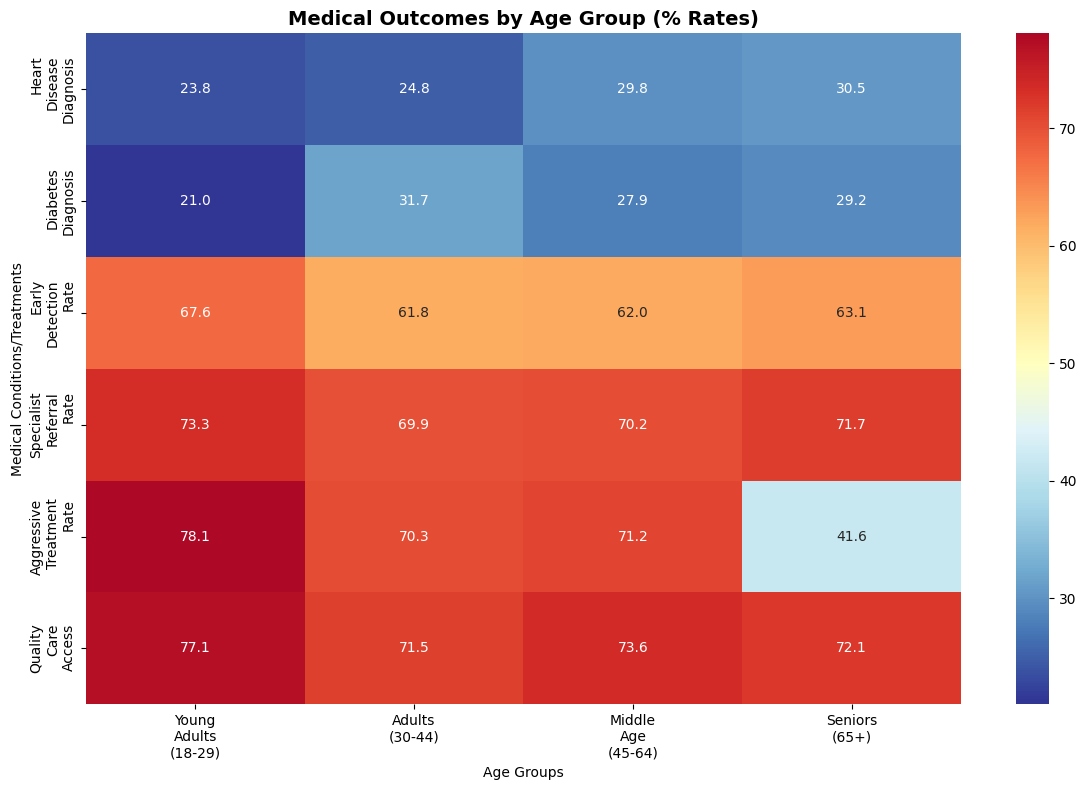

=== AGE BIAS SUMMARY ===
High Age Bias (1 conditions): Aggressive Treatment Rate
Moderate Age Bias (1 conditions): Diabetes Diagnosis
Low Age Bias (4 conditions): Heart Disease Diagnosis, Early Detection Rate, Specialist Referral Rate, Quality Care Access



In [10]:
# Visualize age bias patterns

print("=== AGE BIAS VISUALIZATION ===")
print()

# Create heatmap showing rates across age groups
age_data_for_viz = []
age_groups_ordered = ['Young Adults (18-29)', 'Adults (30-44)', 'Middle Age (45-64)', 'Seniors (65+)']

for condition, results in age_bias_results.items():
    crosstab = results['crosstab']
    if True in crosstab.columns:
        condition_rates = []
        for age_group in age_groups_ordered:
            if age_group in crosstab.index:
                condition_rates.append(crosstab.loc[age_group, True])
            else:
                condition_rates.append(0)
        age_data_for_viz.append(condition_rates)

# Create heatmap
plt.figure(figsize=(12, 8))
heatmap_data = np.array(age_data_for_viz)
condition_names = list(age_bias_results.keys())

sns.heatmap(heatmap_data, 
            xticklabels=[ag.replace(' ', '\n') for ag in age_groups_ordered],
            yticklabels=[cn.replace(' ', '\n') for cn in condition_names],
            annot=True, 
            fmt='.1f', 
            cmap='RdYlBu_r', 
            center=50)

plt.title('Medical Outcomes by Age Group (% Rates)', fontweight='bold', fontsize=14)
plt.xlabel('Age Groups')
plt.ylabel('Medical Conditions/Treatments')
plt.tight_layout()
plt.show()

# Age bias summary
print("=== AGE BIAS SUMMARY ===")
high_age_bias = [name for name, results in age_bias_results.items() if results['bias_level'] == 'HIGH']
moderate_age_bias = [name for name, results in age_bias_results.items() if results['bias_level'] == 'MODERATE']
low_age_bias = [name for name, results in age_bias_results.items() if results['bias_level'] == 'LOW']

print(f"High Age Bias ({len(high_age_bias)} conditions): {', '.join(high_age_bias) if high_age_bias else 'None'}")
print(f"Moderate Age Bias ({len(moderate_age_bias)} conditions): {', '.join(moderate_age_bias) if moderate_age_bias else 'None'}")
print(f"Low Age Bias ({len(low_age_bias)} conditions): {', '.join(low_age_bias) if low_age_bias else 'None'}")
print()

## Step 7: Examine racial/ethnic disparities

Now let's investigate potential racial and ethnic disparities in medical outcomes and care quality.

In [11]:
# Analyze racial/ethnic bias in medical care

print("=== RACIAL/ETHNIC BIAS DETECTION ===")
print()

def analyze_bias_by_race(condition_column, condition_name):
    """
    Analyze bias in medical conditions by race/ethnicity
    """
    print(f"--- {condition_name.upper()} BY RACE/ETHNICITY ---")
    
    # Create cross-tabulation
    crosstab = pd.crosstab(medical_data['Race'], medical_data[condition_column], 
                          margins=True, normalize='index') * 100
    
    print("Percentage of patients with condition by race/ethnicity:")
    print(crosstab.round(1))
    print()
    
    # Calculate disparities
    if True in crosstab.columns:
        rates = crosstab[True].drop('All')  # Remove the 'All' row
        max_rate = rates.max()
        min_rate = rates.min()
        disparity = max_rate - min_rate
        
        # Compare minority groups to White patients
        if 'White' in rates.index:
            white_rate = rates['White']
            minority_disparities = {}
            for race in rates.index:
                if race != 'White':
                    minority_disparities[race] = rates[race] - white_rate
        
        print(f"Highest rate: {max_rate:.1f}% ({rates.idxmax()})")
        print(f"Lowest rate: {min_rate:.1f}% ({rates.idxmin()})")
        print(f"Overall disparity: {disparity:.1f} percentage points")
        
        if 'White' in rates.index:
            print(f"\nDisparities compared to White patients:")
            for race, diff in minority_disparities.items():
                direction = "higher" if diff > 0 else "lower"
                print(f"  {race}: {abs(diff):.1f} points {direction}")
        
        # Bias assessment
        if disparity > 15:
            print(f"\n🚨 SIGNIFICANT RACIAL DISPARITY: {disparity:.1f}% difference")
            bias_level = "HIGH"
        elif disparity > 8:
            print(f"\n⚠️ MODERATE RACIAL DISPARITY: {disparity:.1f}% difference")
            bias_level = "MODERATE"
        else:
            print(f"\n✓ MINIMAL RACIAL DISPARITY: {disparity:.1f}% difference")
            bias_level = "LOW"
    else:
        disparity = 0
        bias_level = "LOW"
    
    print()
    
    return crosstab, bias_level, disparity

# Analyze racial bias for each medical condition
racial_bias_results = {}

for condition, name in conditions_to_analyze.items():
    crosstab, bias_level, difference = analyze_bias_by_race(condition, name)
    racial_bias_results[name] = {
        'bias_level': bias_level,
        'difference': difference,
        'crosstab': crosstab
    }

=== RACIAL/ETHNIC BIAS DETECTION ===

--- HEART DISEASE DIAGNOSIS BY RACE/ETHNICITY ---
Percentage of patients with condition by race/ethnicity:
HeartDisease  False  True
Race                     
Asian          72.8  27.2
Black          73.1  26.9
Hispanic       69.7  30.3
Other          73.3  26.7
White          71.9  28.1
All            71.9  28.1

Highest rate: 30.3% (Hispanic)
Lowest rate: 26.7% (Other)
Overall disparity: 3.6 percentage points

Disparities compared to White patients:
  Asian: 0.9 points lower
  Black: 1.2 points lower
  Hispanic: 2.2 points higher
  Other: 1.4 points lower

✓ MINIMAL RACIAL DISPARITY: 3.6% difference

--- DIABETES DIAGNOSIS BY RACE/ETHNICITY ---
Percentage of patients with condition by race/ethnicity:
Diabetes  False  True
Race                 
Asian      69.1  30.9
Black      65.0  35.0
Hispanic   70.4  29.6
Other      66.7  33.3
White      74.1  25.9
All        71.6  28.4

Highest rate: 35.0% (Black)
Lowest rate: 25.9% (White)
Overall disparity:

=== RACIAL/ETHNIC DISPARITY VISUALIZATION ===



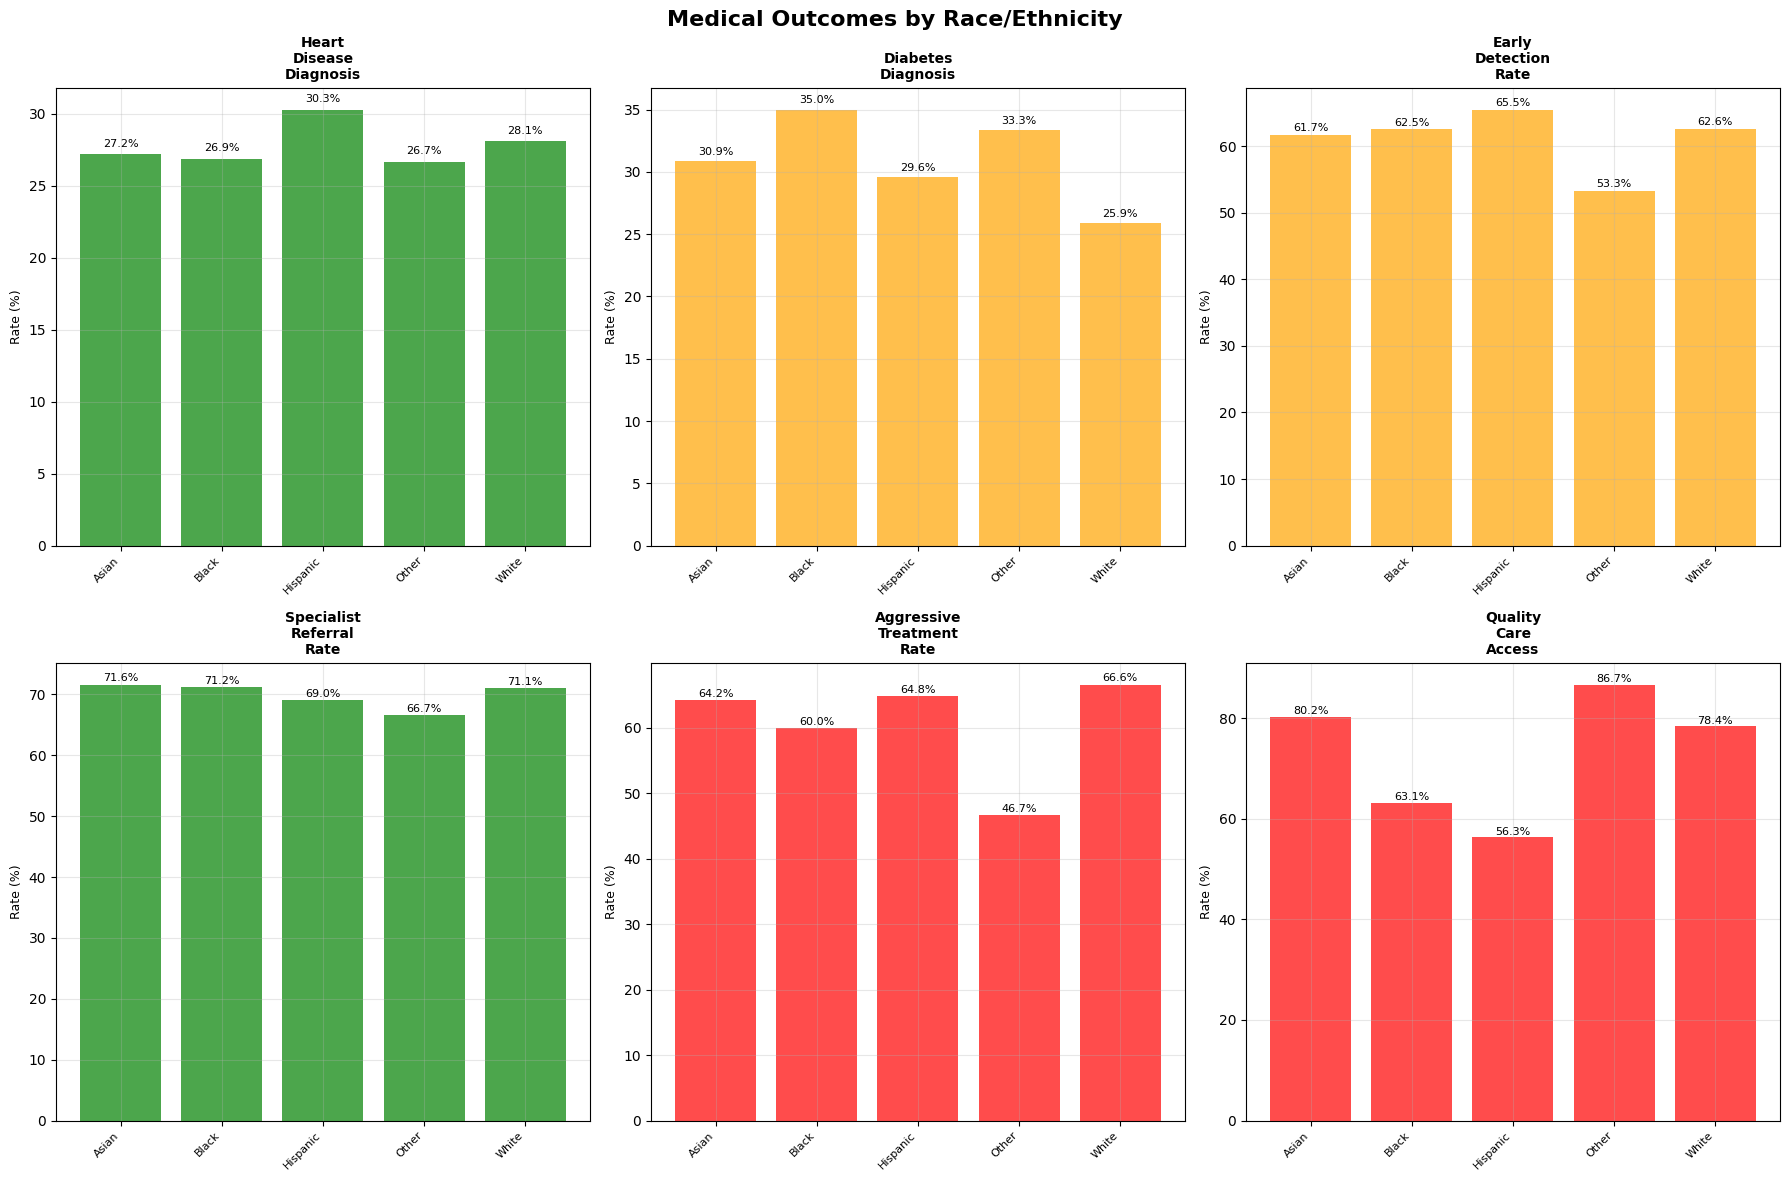

=== RACIAL/ETHNIC BIAS SUMMARY ===
High Racial Disparities (2 conditions): Aggressive Treatment Rate, Quality Care Access
Moderate Racial Disparities (2 conditions): Diabetes Diagnosis, Early Detection Rate
Low Racial Disparities (2 conditions): Heart Disease Diagnosis, Specialist Referral Rate



In [12]:
# Visualize racial/ethnic disparities

print("=== RACIAL/ETHNIC DISPARITY VISUALIZATION ===")
print()

# Create comprehensive visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, (condition, results) in enumerate(racial_bias_results.items()):
    if idx < len(axes):
        crosstab = results['crosstab']
        if True in crosstab.columns:
            rates = crosstab[True].drop('All')  # Remove the 'All' row
            
            # Color code bars based on bias level
            colors = ['red' if results['bias_level'] == 'HIGH' else 
                     'orange' if results['bias_level'] == 'MODERATE' else 'green'] * len(rates)
            
            axes[idx].bar(range(len(rates)), rates.values, color=colors, alpha=0.7)
            axes[idx].set_title(condition.replace(' ', '\n'), fontweight='bold', fontsize=10)
            axes[idx].set_xticks(range(len(rates)))
            axes[idx].set_xticklabels(rates.index, rotation=45, ha='right', fontsize=8)
            axes[idx].set_ylabel('Rate (%)', fontsize=9)
            axes[idx].grid(True, alpha=0.3)
            
            # Add value labels on bars
            for i, v in enumerate(rates.values):
                axes[idx].text(i, v + 0.5, f'{v:.1f}%', ha='center', fontsize=8)

plt.suptitle('Medical Outcomes by Race/Ethnicity', fontweight='bold', fontsize=16)
plt.tight_layout()
plt.show()

# Racial bias summary
print("=== RACIAL/ETHNIC BIAS SUMMARY ===")
high_racial_bias = [name for name, results in racial_bias_results.items() if results['bias_level'] == 'HIGH']
moderate_racial_bias = [name for name, results in racial_bias_results.items() if results['bias_level'] == 'MODERATE']
low_racial_bias = [name for name, results in racial_bias_results.items() if results['bias_level'] == 'LOW']

print(f"High Racial Disparities ({len(high_racial_bias)} conditions): {', '.join(high_racial_bias) if high_racial_bias else 'None'}")
print(f"Moderate Racial Disparities ({len(moderate_racial_bias)} conditions): {', '.join(moderate_racial_bias) if moderate_racial_bias else 'None'}")
print(f"Low Racial Disparities ({len(low_racial_bias)} conditions): {', '.join(low_racial_bias) if low_racial_bias else 'None'}")
print()

## Step 8: Assess socioeconomic bias

Let's examine how insurance coverage (as a proxy for socioeconomic status) affects medical care and outcomes.

In [13]:
# Analyze socioeconomic bias through insurance coverage

print("=== SOCIOECONOMIC BIAS DETECTION (Insurance Coverage) ===")
print()

def analyze_bias_by_insurance(condition_column, condition_name):
    """
    Analyze bias in medical conditions by insurance type (socioeconomic proxy)
    """
    print(f"--- {condition_name.upper()} BY INSURANCE TYPE ---")
    
    # Create cross-tabulation
    crosstab = pd.crosstab(medical_data['Insurance'], medical_data[condition_column], 
                          margins=True, normalize='index') * 100
    
    print("Percentage of patients with condition by insurance type:")
    print(crosstab.round(1))
    print()
    
    # Calculate disparities
    if True in crosstab.columns:
        rates = crosstab[True].drop('All')  # Remove the 'All' row
        
        # Compare to private insurance (usually best coverage)
        if 'Private' in rates.index:
            private_rate = rates['Private']
            disparities = {}
            for insurance in rates.index:
                if insurance != 'Private':
                    disparities[insurance] = rates[insurance] - private_rate
        
        max_rate = rates.max()
        min_rate = rates.min()
        range_difference = max_rate - min_rate
        
        print(f"Highest rate: {max_rate:.1f}% ({rates.idxmax()})")
        print(f"Lowest rate: {min_rate:.1f}% ({rates.idxmin()})")
        print(f"Range: {range_difference:.1f} percentage points")
        
        if 'Private' in rates.index:
            print(f"\nDisparities compared to Private insurance:")
            for insurance, diff in disparities.items():
                direction = "higher" if diff > 0 else "lower"
                print(f"  {insurance}: {abs(diff):.1f} points {direction}")
        
        # Bias assessment
        if range_difference > 12:
            print(f"\n🚨 SIGNIFICANT SOCIOECONOMIC BIAS: {range_difference:.1f}% range")
            bias_level = "HIGH"
        elif range_difference > 6:
            print(f"\n⚠️ MODERATE SOCIOECONOMIC BIAS: {range_difference:.1f}% range")
            bias_level = "MODERATE"
        else:
            print(f"\n✓ MINIMAL SOCIOECONOMIC BIAS: {range_difference:.1f}% range")
            bias_level = "LOW"
    else:
        range_difference = 0
        bias_level = "LOW"
    
    print()
    
    return crosstab, bias_level, range_difference

# Analyze socioeconomic bias for each medical condition
socioeconomic_bias_results = {}

for condition, name in conditions_to_analyze.items():
    crosstab, bias_level, difference = analyze_bias_by_insurance(condition, name)
    socioeconomic_bias_results[name] = {
        'bias_level': bias_level,
        'difference': difference,
        'crosstab': crosstab
    }

=== SOCIOECONOMIC BIAS DETECTION (Insurance Coverage) ===

--- HEART DISEASE DIAGNOSIS BY INSURANCE TYPE ---
Percentage of patients with condition by insurance type:
HeartDisease  False  True
Insurance                
Medicaid       71.4  28.6
Medicare       69.0  31.0
Private        72.6  27.4
Uninsured      82.2  17.8
All            71.9  28.1

Highest rate: 31.0% (Medicare)
Lowest rate: 17.8% (Uninsured)
Range: 13.2 percentage points

Disparities compared to Private insurance:
  Medicaid: 1.2 points higher
  Medicare: 3.5 points higher
  Uninsured: 9.6 points lower

🚨 SIGNIFICANT SOCIOECONOMIC BIAS: 13.2% range

--- DIABETES DIAGNOSIS BY INSURANCE TYPE ---
Percentage of patients with condition by insurance type:
Diabetes   False  True
Insurance             
Medicaid    70.4  29.6
Medicare    75.8  24.2
Private     70.6  29.4
Uninsured   64.4  35.6
All         71.6  28.4

Highest rate: 35.6% (Uninsured)
Lowest rate: 24.2% (Medicare)
Range: 11.3 percentage points

Disparities compared

=== SOCIOECONOMIC DISPARITY VISUALIZATION ===



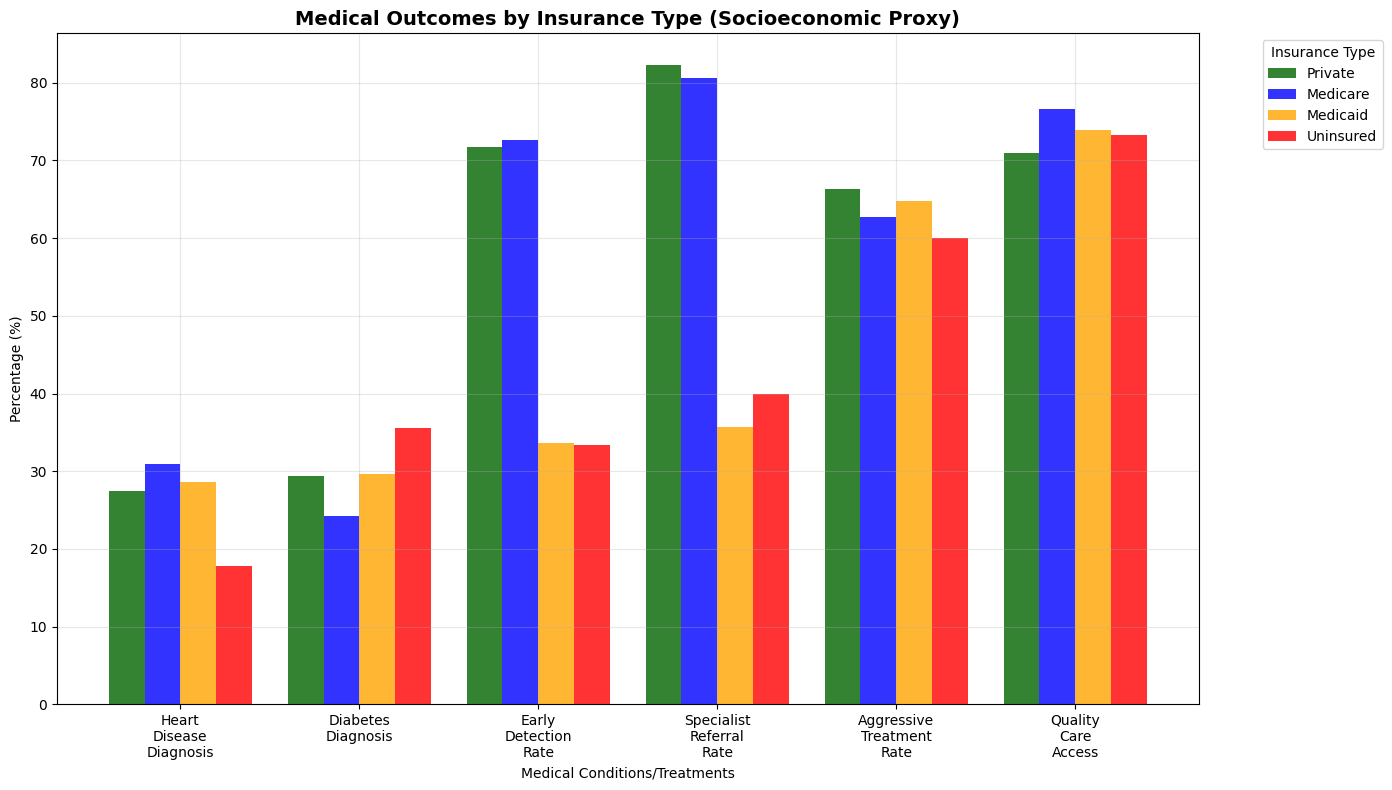

=== SOCIOECONOMIC BIAS SUMMARY ===
High Socioeconomic Disparities (3 conditions): Heart Disease Diagnosis, Early Detection Rate, Specialist Referral Rate
Moderate Socioeconomic Disparities (2 conditions): Diabetes Diagnosis, Aggressive Treatment Rate
Low Socioeconomic Disparities (1 conditions): Quality Care Access



In [14]:
# Visualize socioeconomic disparities

print("=== SOCIOECONOMIC DISPARITY VISUALIZATION ===")
print()

# Create stacked bar chart showing insurance disparities
insurance_data_for_viz = []
insurance_order = ['Private', 'Medicare', 'Medicaid', 'Uninsured']

for condition, results in socioeconomic_bias_results.items():
    crosstab = results['crosstab']
    if True in crosstab.columns:
        condition_rates = []
        for insurance in insurance_order:
            if insurance in crosstab.index:
                condition_rates.append(crosstab.loc[insurance, True])
            else:
                condition_rates.append(0)
        insurance_data_for_viz.append(condition_rates)

# Create grouped bar chart
fig, ax = plt.subplots(figsize=(14, 8))
condition_names = list(socioeconomic_bias_results.keys())
x = np.arange(len(condition_names))
width = 0.2

colors = ['darkgreen', 'blue', 'orange', 'red']
for i, insurance in enumerate(insurance_order):
    rates = [row[i] for row in insurance_data_for_viz]
    ax.bar(x + i * width, rates, width, label=insurance, color=colors[i], alpha=0.8)

ax.set_xlabel('Medical Conditions/Treatments')
ax.set_ylabel('Percentage (%)')
ax.set_title('Medical Outcomes by Insurance Type (Socioeconomic Proxy)', fontweight='bold', fontsize=14)
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels([cn.replace(' ', '\n') for cn in condition_names], rotation=0, ha='center')
ax.legend(title='Insurance Type', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Socioeconomic bias summary
print("=== SOCIOECONOMIC BIAS SUMMARY ===")
high_socio_bias = [name for name, results in socioeconomic_bias_results.items() if results['bias_level'] == 'HIGH']
moderate_socio_bias = [name for name, results in socioeconomic_bias_results.items() if results['bias_level'] == 'MODERATE']
low_socio_bias = [name for name, results in socioeconomic_bias_results.items() if results['bias_level'] == 'LOW']

print(f"High Socioeconomic Disparities ({len(high_socio_bias)} conditions): {', '.join(high_socio_bias) if high_socio_bias else 'None'}")
print(f"Moderate Socioeconomic Disparities ({len(moderate_socio_bias)} conditions): {', '.join(moderate_socio_bias) if moderate_socio_bias else 'None'}")
print(f"Low Socioeconomic Disparities ({len(low_socio_bias)} conditions): {', '.join(low_socio_bias) if low_socio_bias else 'None'}")
print()

## Step 9: Create comprehensive bias report

Now let's create a comprehensive visual report summarizing all biases detected in the medical dataset.

=== COMPREHENSIVE BIAS DETECTION REPORT ===



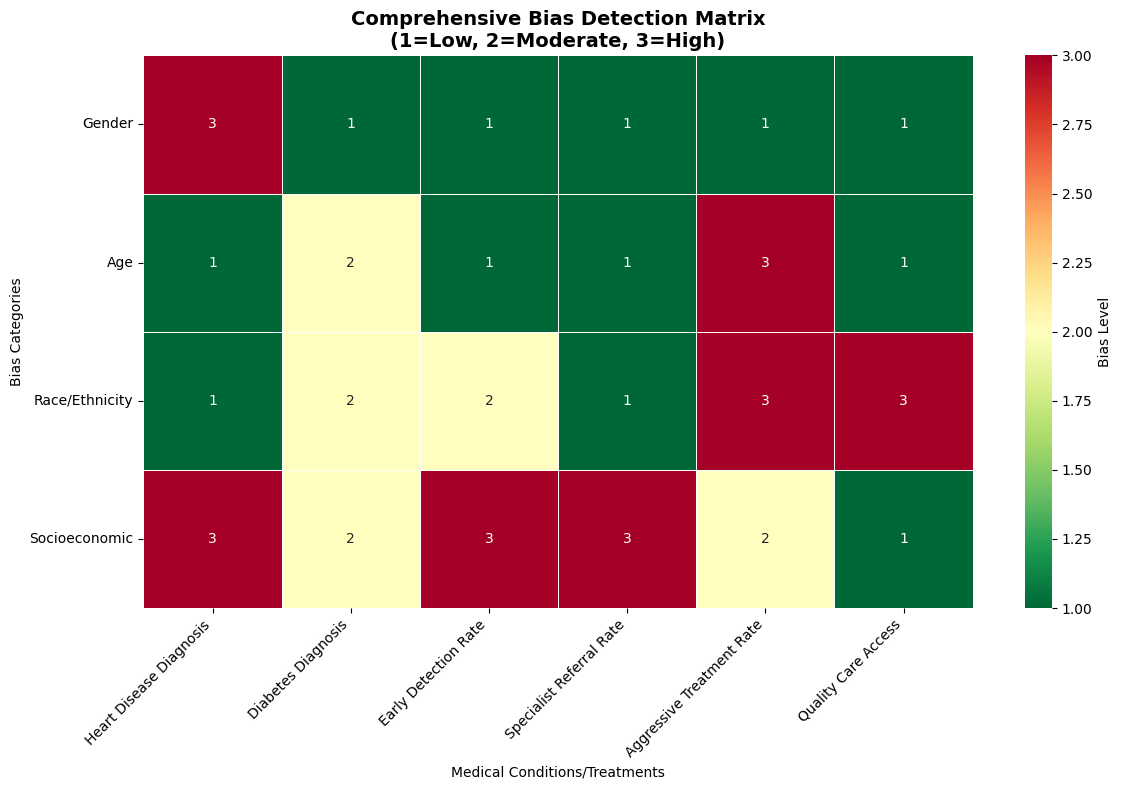

=== DETAILED BIAS SUMMARY ===

Gender Bias:
  High: 1 conditions
  Moderate: 0 conditions
  Low: 5 conditions

Age Bias:
  High: 1 conditions
  Moderate: 1 conditions
  Low: 4 conditions

Race/Ethnicity Bias:
  High: 2 conditions
  Moderate: 2 conditions
  Low: 2 conditions

Socioeconomic Bias:
  High: 3 conditions
  Moderate: 2 conditions
  Low: 1 conditions

=== OVERALL BIAS STATISTICS ===
Total bias instances analyzed: 24
High bias instances: 7 (29.2%)
Moderate bias instances: 5 (20.8%)
Low bias instances: 12 (50.0%)



In [15]:
# Create comprehensive bias summary report

print("=== COMPREHENSIVE BIAS DETECTION REPORT ===")
print()

# Collect all bias results
all_bias_results = {
    'Gender': gender_bias_results,
    'Age': age_bias_results,
    'Race/Ethnicity': racial_bias_results,
    'Socioeconomic': socioeconomic_bias_results
}

# Create bias summary matrix
bias_summary = []
condition_names = list(conditions_to_analyze.values())

for condition in condition_names:
    row = {'Condition': condition}
    for bias_type, results in all_bias_results.items():
        if condition in results:
            level = results[condition]['bias_level']
            # Convert to numeric for visualization
            numeric_level = {'LOW': 1, 'MODERATE': 2, 'HIGH': 3}[level]
            row[bias_type] = numeric_level
        else:
            row[bias_type] = 0
    bias_summary.append(row)

bias_df = pd.DataFrame(bias_summary)
bias_df = bias_df.set_index('Condition')

# Create bias heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(bias_df.T, 
            annot=True, 
            cmap='RdYlGn_r', 
            cbar_kws={'label': 'Bias Level'},
            fmt='d',
            linewidths=0.5)

plt.title('Comprehensive Bias Detection Matrix\n(1=Low, 2=Moderate, 3=High)', 
          fontweight='bold', fontsize=14)
plt.xlabel('Medical Conditions/Treatments')
plt.ylabel('Bias Categories')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Print detailed summary
print("=== DETAILED BIAS SUMMARY ===")
print()

total_high_bias = 0
total_moderate_bias = 0
total_low_bias = 0

for bias_type, results in all_bias_results.items():
    high_count = sum(1 for r in results.values() if r['bias_level'] == 'HIGH')
    moderate_count = sum(1 for r in results.values() if r['bias_level'] == 'MODERATE')
    low_count = sum(1 for r in results.values() if r['bias_level'] == 'LOW')
    
    total_high_bias += high_count
    total_moderate_bias += moderate_count
    total_low_bias += low_count
    
    print(f"{bias_type} Bias:")
    print(f"  High: {high_count} conditions")
    print(f"  Moderate: {moderate_count} conditions")
    print(f"  Low: {low_count} conditions")
    print()

total_bias_instances = total_high_bias + total_moderate_bias + total_low_bias
print(f"=== OVERALL BIAS STATISTICS ===")
print(f"Total bias instances analyzed: {total_bias_instances}")
print(f"High bias instances: {total_high_bias} ({total_high_bias/total_bias_instances*100:.1f}%)")
print(f"Moderate bias instances: {total_moderate_bias} ({total_moderate_bias/total_bias_instances*100:.1f}%)")
print(f"Low bias instances: {total_low_bias} ({total_low_bias/total_bias_instances*100:.1f}%)")
print()

## Step 10: Generate recommendations

Based on the bias analysis, let's generate specific recommendations for addressing the identified biases.

In [16]:
# Generate actionable recommendations based on bias findings

print("=== BIAS MITIGATION RECOMMENDATIONS ===")
print()

def generate_recommendations(bias_results, bias_type):
    """
    Generate specific recommendations based on bias findings
    """
    high_bias_conditions = [name for name, results in bias_results.items() if results['bias_level'] == 'HIGH']
    moderate_bias_conditions = [name for name, results in bias_results.items() if results['bias_level'] == 'MODERATE']
    
    if high_bias_conditions or moderate_bias_conditions:
        print(f"--- {bias_type.upper()} BIAS RECOMMENDATIONS ---")
        
        if high_bias_conditions:
            print(f"\n🚨 URGENT ACTION NEEDED (High {bias_type} Bias):")
            for condition in high_bias_conditions:
                print(f"   • {condition}")
        
        if moderate_bias_conditions:
            print(f"\n⚠️ MONITORING REQUIRED (Moderate {bias_type} Bias):")
            for condition in moderate_bias_conditions:
                print(f"   • {condition}")
        
        # Specific recommendations by bias type
        if bias_type == "Gender":
            print("\n   RECOMMENDED ACTIONS:")
            print("   → Review diagnostic criteria for gender-specific symptoms")
            print("   → Implement gender-balanced clinical protocols")
            print("   → Train staff on unconscious gender bias in healthcare")
            print("   → Ensure equal treatment recommendations across genders")
            
        elif bias_type == "Age":
            print("\n   RECOMMENDED ACTIONS:")
            print("   → Develop age-inclusive treatment protocols")
            print("   → Address ageism in medical decision-making")
            print("   → Ensure aggressive treatment options for all age groups")
            print("   → Review age-based treatment limitations")
            
        elif bias_type == "Race/Ethnicity":
            print("\n   RECOMMENDED ACTIONS:")
            print("   → Implement culturally competent care practices")
            print("   → Address systemic barriers to healthcare access")
            print("   → Provide diversity and inclusion training for staff")
            print("   → Ensure equitable resource allocation across ethnic groups")
            
        elif bias_type == "Socioeconomic":
            print("\n   RECOMMENDED ACTIONS:")
            print("   → Develop financial assistance programs")
            print("   → Ensure quality care regardless of insurance status")
            print("   → Partner with community health centers")
            print("   → Address social determinants of health")
        
        print()

# Generate recommendations for each bias type
generate_recommendations(gender_bias_results, "Gender")
generate_recommendations(age_bias_results, "Age")
generate_recommendations(racial_bias_results, "Race/Ethnicity")
generate_recommendations(socioeconomic_bias_results, "Socioeconomic")

print("=== GENERAL BIAS MITIGATION STRATEGIES ===")
print()
print("1. DATA COLLECTION IMPROVEMENTS:")
print("   • Ensure representative sampling across all demographic groups")
print("   • Collect comprehensive demographic information")
print("   • Regular data quality audits for bias detection")
print()
print("2. CLINICAL PRACTICE ENHANCEMENTS:")
print("   • Standardize diagnostic and treatment protocols")
print("   • Implement bias-aware clinical decision support systems")
print("   • Regular bias training for healthcare professionals")
print()
print("3. MONITORING AND EVALUATION:")
print("   • Establish bias metrics and monitoring dashboards")
print("   • Regular bias audits of medical outcomes")
print("   • Patient feedback systems for bias reporting")
print()
print("4. ORGANIZATIONAL CHANGES:")
print("   • Diverse healthcare teams and leadership")
print("   • Bias-aware policies and procedures")
print("   • Community engagement and partnership programs")
print()
print("5. TECHNOLOGY SOLUTIONS:")
print("   • Bias detection algorithms in medical AI systems")
print("   • Fairness-aware machine learning models")
print("   • Demographic-specific model validation")

=== BIAS MITIGATION RECOMMENDATIONS ===

--- GENDER BIAS RECOMMENDATIONS ---

🚨 URGENT ACTION NEEDED (High Gender Bias):
   • Heart Disease Diagnosis

   RECOMMENDED ACTIONS:
   → Review diagnostic criteria for gender-specific symptoms
   → Implement gender-balanced clinical protocols
   → Train staff on unconscious gender bias in healthcare
   → Ensure equal treatment recommendations across genders

--- AGE BIAS RECOMMENDATIONS ---

🚨 URGENT ACTION NEEDED (High Age Bias):
   • Aggressive Treatment Rate

⚠️ MONITORING REQUIRED (Moderate Age Bias):
   • Diabetes Diagnosis

   RECOMMENDED ACTIONS:
   → Develop age-inclusive treatment protocols
   → Address ageism in medical decision-making
   → Ensure aggressive treatment options for all age groups
   → Review age-based treatment limitations

--- RACE/ETHNICITY BIAS RECOMMENDATIONS ---

🚨 URGENT ACTION NEEDED (High Race/Ethnicity Bias):
   • Aggressive Treatment Rate
   • Quality Care Access

⚠️ MONITORING REQUIRED (Moderate Race/Ethnici

## Lab summary and next steps

Summarize and provide guidance for implementing bias detection in real healthcare settings.

In [17]:
# Final summary and next steps

print("=== LAB COMPLETION SUMMARY ===")
print()
print("✓ OBJECTIVES COMPLETED:")
print("\n1. ✓ Loaded and examined medical dataset structure")
print(f"   - Analyzed {len(medical_data)} patient records")
print(f"   - Examined {len(medical_data.columns)} variables per patient")

print("\n2. ✓ Identified demographic representation patterns")
print("   - Gender distribution analysis")
print("   - Age group categorization and analysis")
print("   - Racial/ethnic representation assessment")
print("   - Socioeconomic status evaluation")

print("\n3. ✓ Detected gender bias in medical outcomes")
gender_high = sum(1 for r in gender_bias_results.values() if r['bias_level'] == 'HIGH')
print(f"   - Found {gender_high} conditions with high gender bias")
print("   - Created visualizations showing gender disparities")

print("\n4. ✓ Analyzed age distribution bias")
age_high = sum(1 for r in age_bias_results.values() if r['bias_level'] == 'HIGH')
print(f"   - Found {age_high} conditions with high age bias")
print("   - Identified age-related treatment disparities")

print("\n5. ✓ Examined racial/ethnic disparities")
racial_high = sum(1 for r in racial_bias_results.values() if r['bias_level'] == 'HIGH')
print(f"   - Found {racial_high} conditions with high racial disparities")
print("   - Quantified healthcare outcome differences")

print("\n6. ✓ Assessed socioeconomic bias")
socio_high = sum(1 for r in socioeconomic_bias_results.values() if r['bias_level'] == 'HIGH')
print(f"   - Found {socio_high} conditions with high socioeconomic bias")
print("   - Analyzed insurance-based care disparities")

print("\n7. ✓ Created comprehensive visual reports")
print("   - Generated bias detection matrices")
print("   - Created condition-specific visualizations")
print("   - Produced summary dashboards")

print("\n8. ✓ Generated actionable recommendations")
print("   - Provided bias-specific mitigation strategies")
print("   - Outlined organizational improvement plans")
print("   - Suggested monitoring and evaluation approaches")

print("\n" + "="*60)
print("BIAS DETECTION SKILLS ACQUIRED:")
print("="*60)
print("• Statistical bias detection methods")
print("• Cross-tabulation analysis techniques")
print("• Healthcare disparity identification")
print("• Data visualization for bias communication")
print("• Evidence-based recommendation development")
print("• Systematic bias monitoring approaches")

print("\n=== NEXT STEPS FOR REAL-WORLD APPLICATION ===")
print()
print("IMMEDIATE ACTIONS (Week 1-2):")
print("□ Apply these methods to your institution's actual data")
print("□ Identify key stakeholders for bias mitigation efforts")
print("□ Present findings to leadership and clinical teams")

print("\nSHORT-TERM GOALS (Month 1-3):")
print("□ Establish regular bias monitoring protocols")
print("□ Implement staff training on identified biases")
print("□ Begin addressing high-priority bias issues")

print("\nLONG-TERM OBJECTIVES (3-12 months):")
print("□ Integrate bias detection into quality improvement programs")
print("□ Develop automated bias monitoring systems")
print("□ Measure improvement in healthcare equity metrics")
print("□ Share best practices with other healthcare organizations")

print("\n=== IMPORTANT ETHICAL CONSIDERATIONS ===")
print()
print("⚠️  REMEMBER:")
print("• Bias detection is the first step toward healthcare equity")
print("• Statistical bias doesn't always indicate intentional discrimination")
print("• Address systemic factors, not just individual behaviors")
print("• Engage affected communities in solution development")
print("• Continuous monitoring is essential for sustained improvement")

print("\n" + "="*60)
print("CONGRATULATIONS!")
print("You now have the tools to detect and address bias in medical datasets.")
print("Use these skills to promote equitable healthcare for all patients.")
print("="*60)

=== LAB COMPLETION SUMMARY ===

✓ OBJECTIVES COMPLETED:

1. ✓ Loaded and examined medical dataset structure
   - Analyzed 1000 patient records
   - Examined 16 variables per patient

2. ✓ Identified demographic representation patterns
   - Gender distribution analysis
   - Age group categorization and analysis
   - Racial/ethnic representation assessment
   - Socioeconomic status evaluation

3. ✓ Detected gender bias in medical outcomes
   - Found 1 conditions with high gender bias
   - Created visualizations showing gender disparities

4. ✓ Analyzed age distribution bias
   - Found 1 conditions with high age bias
   - Identified age-related treatment disparities

5. ✓ Examined racial/ethnic disparities
   - Found 2 conditions with high racial disparities
   - Quantified healthcare outcome differences

6. ✓ Assessed socioeconomic bias
   - Found 3 conditions with high socioeconomic bias
   - Analyzed insurance-based care disparities

7. ✓ Created comprehensive visual reports
   - Gener